
# Lending Club Case Study

This assignment is created to solve and understand the real world problems faced by a Lending Club.

Here we will be working on the data provieded to us.

As we go through the steps to get an understand of data analisys and data processing and get some insight into risks and issues faced by a Lending Club.

## Our plan of action:
Before we start visualizing and drawing consultions we must:
1. Understanding the data: This involves ,
* seeing the raw data.
* finding the columns that might be of interest.
* seeing the values held by a column.
2. Cleaning the data: This would involve ,
* Dropping columns that dont have any values.
* Dropping columns that dont add any value to the data set.
* standardization of the values in the data set.
* Replace the null values if that can be done depending on the column.
3. Create new columns : We will now create columns that might give us a deeper insight into the data and help create more segmenting atributes .

### So lets get into it!


#### Installs you might need to run the notebook if you have a fresh install of Jupyter

#### Imports needed

In [609]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#### Loading the data into a data set .

In [610]:
LC_Data = pd.read_csv("Data\loan.csv" ,index_col=False,dtype="unicode")

#### Lets View the data 

In [611]:
LC_Data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

In [612]:
# Adding code to see all the columns of data set
pd.set_option('display.max_columns', 112)
LC_Data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0,0,3005.666844,3005.67,2400,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20,0,Feb-96,1,35,NaN,10,0,5598,21%,37,f,0,0,12231.89,12231.89,10000,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,

## Cleaning the Data
#### Dropping columns 

In [613]:
# first lets find the total no. of rows
LC_Data.shape

(39717, 111)

In [614]:
# lets find all the columns with null values
LC_Data.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    id                              39717 non-null  object
 1    member_id                       39717 non-null  object
 2    loan_amnt                       39717 non-null  object
 3    funded_amnt                     39717 non-null  object
 4    funded_amnt_inv                 39717 non-null  object
 5    term                            39717 non-null  object
 6    int_rate                        39717 non-null  object
 7    installment                     39717 non-null  object
 8    grade                           39717 non-null  object
 9    sub_grade                       39717 non-null  object
 10   emp_title                       37258 non-null  object
 11   emp_length                      38642 non-null  object
 12   home_ownership                

In [615]:
# as we see there are many columns with 0 non-null Values theya re of no use.
# we need to find the names of all the columns with 100% null values
null_percent = LC_Data.isnull().sum() * 100 / len(LC_Data)
missing_data=pd.DataFrame({"Column":LC_Data.columns,"Null_Percent":null_percent.round(1)})
missing_data.sort_values("Null_Percent",inplace=True, ascending= False)
# Lets manke a list of all the columns that have only null values
null_column = missing_data[missing_data['Null_Percent']==100.0].Column.tolist()
len(null_column)

54

In [616]:
# As we see we have 54 Columns that have no data we can drop them 
LC_Data_Nullcol_Dropped = LC_Data.drop(null_column,axis =1)
LC_Data_Nullcol_Dropped.shape

(39717, 57)

In [617]:
# Dropping Columns that dont add any value 
LC_Data_Nullcol_Dropped= LC_Data_Nullcol_Dropped.drop(["url","initial_list_status","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens","pymnt_plan"],axis=1)
LC_Data_Nullcol_Dropped.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       39717 non-null  object
 1   member_id                39717 non-null  object
 2   loan_amnt                39717 non-null  object
 3   funded_amnt              39717 non-null  object
 4   funded_amnt_inv          39717 non-null  object
 5   term                     39717 non-null  object
 6   int_rate                 39717 non-null  object
 7   installment              39717 non-null  object
 8   grade                    39717 non-null  object
 9   sub_grade                39717 non-null  object
 10  emp_title                37258 non-null  object
 11  emp_length               38642 non-null  object
 12  home_ownership           39717 non-null  object
 13  annual_inc               39717 non-null  object
 14  verification_status      39717 non-nul

In [618]:
# Dropping Columns that would not be present for us while applying for the loan:
col_list=['inq_last_6mths','delinq_2yrs','sub_grade','grade','earliest_cr_line','last_pymnt_amnt','last_pymnt_d','recoveries','mths_since_last_record','mths_since_last_delinq','collection_recovery_fee','total_rec_late_fee','next_pymnt_d','revol_util','revol_bal','out_prncp','out_prncp_inv','last_credit_pull_d']
LC_Data_Nullcol_Dropped=LC_Data_Nullcol_Dropped.drop(col_list,axis = 1)

In [619]:
# Dropping data that cannot be used for analysis (unique to row)
LC_Data_Nullcol_Dropped = LC_Data_Nullcol_Dropped.drop(["id","member_id","desc",],axis=1)

# look at % of nulls again 
null_percent = LC_Data_Nullcol_Dropped.isnull().sum() * 100 / len(LC_Data_Nullcol_Dropped)
missing_data=pd.DataFrame({"Column":LC_Data_Nullcol_Dropped.columns,"Null_Percent":null_percent.round(1)})
missing_data.sort_values("Null_Percent",inplace=True, ascending= False)
missing_data

,Column,Null_Percent
emp_title,emp_title,6.2
emp_length,emp_length,2.7
pub_rec_bankruptcies,pub_rec_bankruptcies,1.8
title,title,0.0
total_rec_int,total_rec_int,0.0
total_rec_prncp,total_rec_prncp,0.0
total_pymnt_inv,total_pymnt_inv,0.0
total_pymnt,total_pymnt,0.0
total_acc,total_acc,0.0
pub_rec,pub_rec,0.0


In [620]:
# Dropping emp_title as there are almost all unique values and high null values
LC_Data_Nullcol_Dropped=LC_Data_Nullcol_Dropped.drop('emp_title',axis=1)
# we will fill the emp length null values once we can fix the data type and data display.


In [621]:
# Dropping all rows with current loan status as they are inconculsive in nature.i.e nither fully paid nor charged off
LC_Data_Nullcol_Dropped=LC_Data_Nullcol_Dropped[LC_Data_Nullcol_Dropped.loan_status !='Current']

#### Data Type correction:

In [622]:
LC_Data_Nullcol_Dropped.issue_d=pd.to_datetime(LC_Data_Nullcol_Dropped.issue_d.str.upper(), format='%b-%y', yearfirst=False)


In [623]:
# Setting the data type of each column and standerdizing the data 
columns=['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc','dti', 'total_pymnt', 'total_pymnt_inv','pub_rec_bankruptcies']
LC_Data_Nullcol_Dropped[columns]=LC_Data_Nullcol_Dropped[columns].astype(float)
LC_Data_Nullcol_Dropped.term = LC_Data_Nullcol_Dropped.term.apply(lambda x: int(x.replace(" months","")))
LC_Data_Nullcol_Dropped.int_rate=LC_Data_Nullcol_Dropped.int_rate.apply(lambda x:float(x[:-1]))


In [624]:
#emp Length is defined in a way that will not allow for analisys so we will try to standerdize it 
#here 10+ years will be taken as 10
#here <1 will be 0.5
def emp_length_func(y):
    y=str(y)
    l=y.split(" y")
    if l[0] == "< 1":
        return 0.5
    elif l[0] =="10+":
        return 10
    elif l[0] == "nan":
        return None
    else:
        return int(l[0])

LC_Data_Nullcol_Dropped.emp_length= LC_Data_Nullcol_Dropped.emp_length.apply(emp_length_func)

In [625]:
LC_Data_Nullcol_Dropped.inq_last_6mths=LC_Data.inq_last_6mths.apply(lambda x : int(x))
LC_Data_Nullcol_Dropped.open_acc=LC_Data_Nullcol_Dropped.open_acc.apply(lambda x : int(x))
LC_Data_Nullcol_Dropped.total_acc=LC_Data_Nullcol_Dropped.total_acc.apply(lambda x : int(x))
LC_Data_Nullcol_Dropped.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  float64       
 1   funded_amnt           38577 non-null  float64       
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int64         
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   emp_length            37544 non-null  float64       
 7   home_ownership        38577 non-null  object        
 8   annual_inc            38577 non-null  float64       
 9   verification_status   38577 non-null  object        
 10  issue_d               38577 non-null  datetime64[ns]
 11  loan_status           38577 non-null  object        
 12  purpose               38577 non-null  object        
 13  title           

In [626]:
null_count = LC_Data_Nullcol_Dropped.isnull().sum()
missing_data=pd.DataFrame({"Column":LC_Data_Nullcol_Dropped.columns,"Null Val":null_count})
missing_data.sort_values("Null Val",inplace=True, ascending= False)
missing_data[missing_data['Null Val']>0]

,Column,Null Val
emp_length,emp_length,1033
pub_rec_bankruptcies,pub_rec_bankruptcies,697
title,title,11


In [627]:
#Since the most common factor in this feild is only 0.3 % of the total data set and there are 6% null values we can drop this column
LC_Data_Nullcol_Dropped=LC_Data_Nullcol_Dropped.drop('title',axis=1)

In [628]:
#Look For duplicates in our data set
LC_Data_Nullcol_Dropped[LC_Data_Nullcol_Dropped.duplicated()]
# We have no duplicates 

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,open_acc,pub_rec,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,pub_rec_bankruptcies


In [629]:
#Setting Categoric data 
col = [ 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'open_acc', 'pub_rec_bankruptcies']
LC_Data_Nullcol_Dropped[col] = LC_Data_Nullcol_Dropped[col].apply(lambda x: x.astype('category'))

In [630]:
# Now that we have all the columns set in the right format we can keep that and copy and we have our final data frame for EDA
Data_LC = LC_Data_Nullcol_Dropped.copy(deep= True)
#Create a CSV that dropped out side the notebook to have a check point
LC_Data_Nullcol_Dropped.to_csv("New_Data.csv", index=False,mode='w+')
# From this point on we will not be dropping any more columns 

In [631]:
#[str(x).zfill(2) for x in pd.DatetimeIndex(Data_LC['issue_d']).day]


## Exploratory Data Analytics

In [632]:
# List out the number of unique values in each column to see what ca be used to univariant analisys
temp_list=[]
for col in Data_LC.columns.to_list():
    temp_list.append({"Column":col,"Values" : len(Data_LC[col].unique())})
col_val=pd.DataFrame(temp_list).sort_values('Values')
col_val.head(10)

,Column,Values
11,loan_status,2
3,term,2
9,verification_status,3
23,pub_rec_bankruptcies,4
7,home_ownership,5
17,pub_rec,5
6,emp_length,12
12,purpose,14
16,open_acc,40
14,addr_state,50


In [633]:
# There is a simpler command to achive the same result 
Data_LC.nunique().sort_values()

loan_status                 2
term                        2
verification_status         3
pub_rec_bankruptcies        3
home_ownership              5
pub_rec                     5
emp_length                 11
purpose                    14
open_acc                   40
addr_state                 50
issue_d                    55
total_acc                  82
int_rate                  370
zip_code                  822
loan_amnt                 870
funded_amnt              1019
dti                      2853
annual_inc               5215
total_rec_prncp          6841
funded_amnt_inv          8050
installment             15022
total_rec_int           34025
total_pymnt_inv         36387
total_pymnt             36714
dtype: int64

#### Univariant Analisys

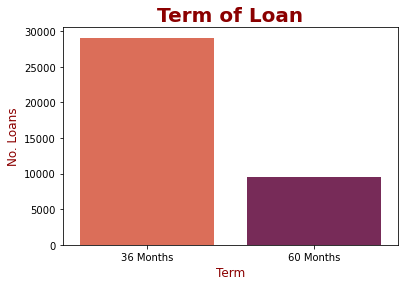

In [634]:
# See the count of each value in "term"
sns.countplot(x= Data_LC['term'],palette="rocket_r")
values=Data_LC['term'].unique()
update=[str(x)+" Months" for x in values]
font={'color':'darkred','weight':'heavy','size':20}
font2={'color':'darkred','weight':'normal','size':12}
plt.title("Term of Loan",fontdict=font)
plt.xlabel("Term",fontdict=font2)
plt.ylabel("No. Loans",fontdict=font2)
plt.xticks([0,1],update)

plt.show()

Most Loans are of 3 Years

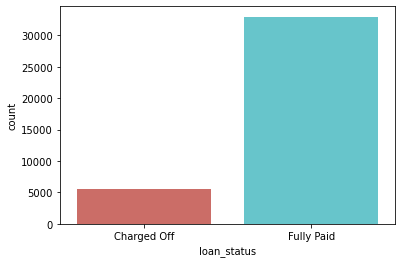

In [635]:
#Visualize Loan Status
sns.countplot(x= Data_LC['loan_status'],palette="hls")
plt.show()

* Most loans are paid off
* 14%-15% of the loans are the defaulters 

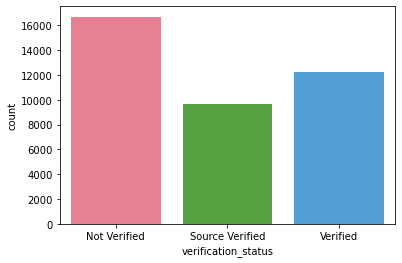

In [636]:
# visualize Verification status
sns.countplot(x= Data_LC['verification_status'],palette="husl")
plt.show()

* 40% -45% of the loans are unverified

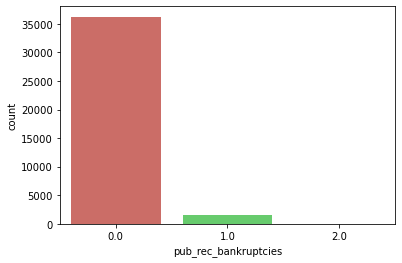

In [637]:
# visualize public bankrupcy
sns.countplot(x= Data_LC['pub_rec_bankruptcies'],palette="hls")
plt.show()

Inconclusive

In [638]:
#looking a loan amount to understand its values
Data_LC.funded_amnt_inv.describe()

count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

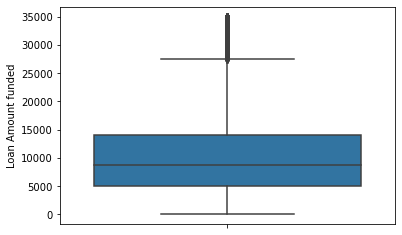

In [639]:
#Since the mean and median are not similar lets look at the box plot
sns.boxplot(y=Data_LC.funded_amnt_inv)
plt.ylabel("Loan Amount funded")
plt.show()

 Looks Like we have outliers from 30,000 onwards

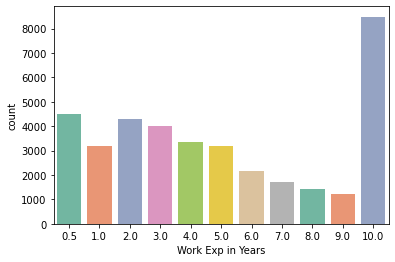

In [640]:
#Analysis of work exp of loan applicants
sns.countplot(x=Data_LC.emp_length,palette='Set2')
plt.xlabel("Work Exp in Years")
plt.show()

* Majority of loan aplicants have Work Exp of 10 years or more
* Least number of people who applied for the loan are with work exp between  

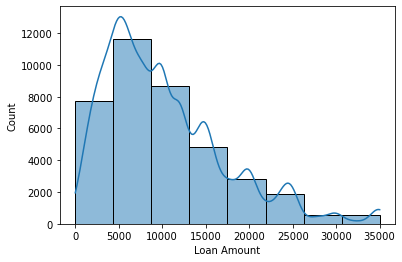

In [641]:
# analysis of loan amount
sns.histplot(data=Data_LC,x="funded_amnt_inv",bins=8,kde=True,)
plt.xlabel("Loan Amount")
plt.show()

Most common Loan Amount funded is in the range of 5000-10000

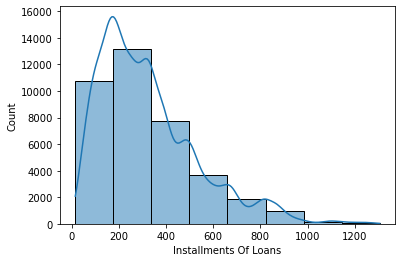

In [642]:
#analisys of Installment Column
sns.histplot(data=Data_LC,x="installment",bins=8,kde=True)
plt.xlabel("Installments Of Loans")
plt.show()

Here we can see most of the applicants pay around $200 as installment

In [643]:
#analisys of annual income
Data_LC.annual_inc.describe().apply(lambda x: format(x, 'f'))

count      38577.000000
mean       68777.973681
std        64218.681802
min         4000.000000
25%        40000.000000
50%        58868.000000
75%        82000.000000
max      6000000.000000
Name: annual_inc, dtype: object

There is a huge gap between 75% and max which means there are huge outliers we need to see it more closely

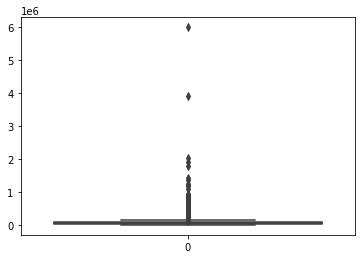

In [644]:
sns.boxplot(data=Data_LC.annual_inc)
plt.yscale='log'
plt.show()

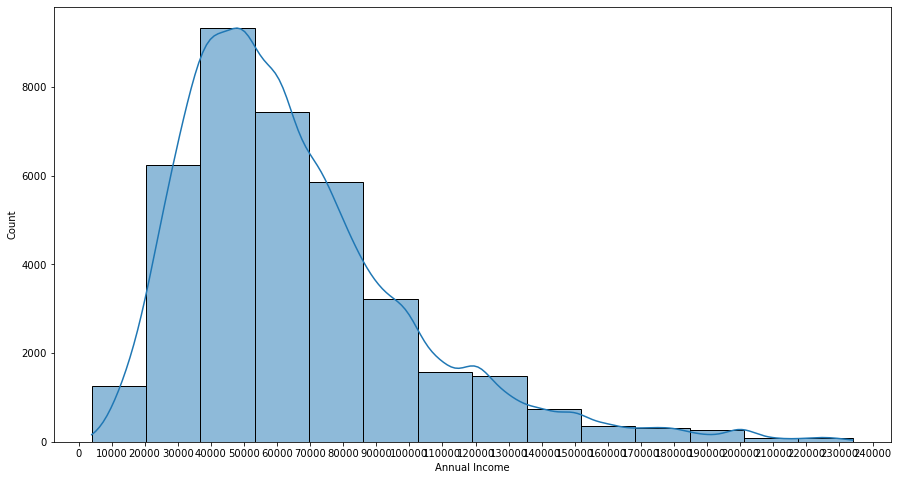

386 records left out as outliers for this plot that is the last 1%


In [645]:
ann_inc_no_out=Data_LC.annual_inc[Data_LC.annual_inc<np.percentile(Data_LC.annual_inc,99)]
diff=len(Data_LC.annual_inc)-len(ann_inc_no_out)
plt.figure(figsize=(15,8))
sns.histplot(x=ann_inc_no_out,bins=14,kde=True)

plt.xlabel("Annual Income")
plt.xticks(list(range(0,250000,10000)))
plt.show()
print(diff,"records left out as outliers for this plot that is the last 1%")


Removing the outliers we get a graph that shows us that most of the applicants have an annual income between 40,000 and 50,000

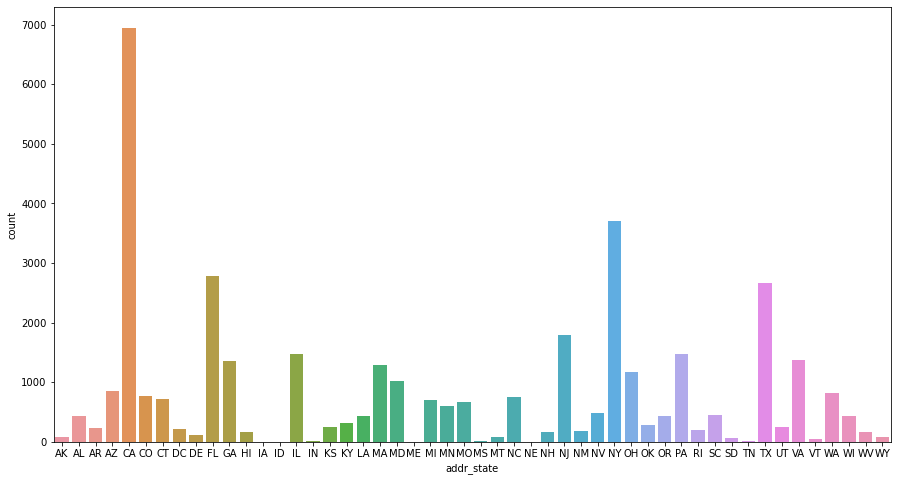

In [646]:
#analisys of the states that applied for the most loans
plt.figure(figsize=(15,8))
sns.countplot(x=Data_LC.addr_state)
plt.show()

Largest Number of Loan aplicants are from California

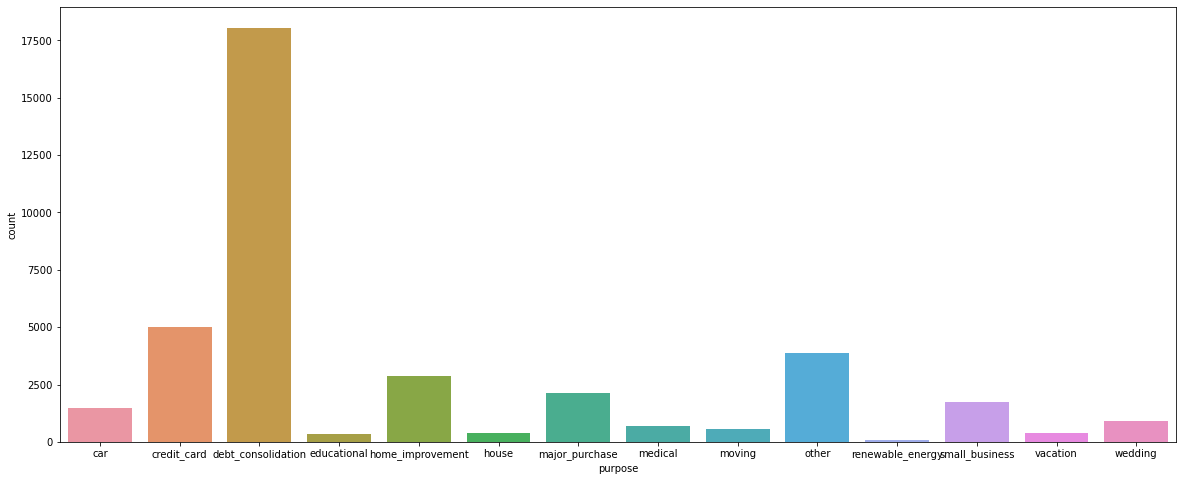

In [647]:
# analisys of Purpose of loan
plt.figure(figsize=(20,8))
sns.countplot(x=Data_LC.purpose)
plt.show()

Most common reason to take loan is to consolidate debt into a single loan

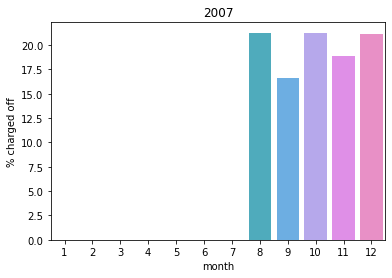

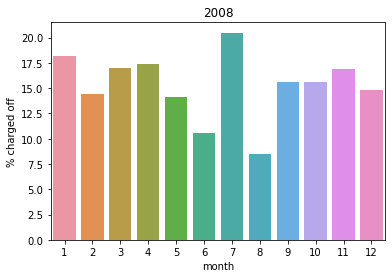

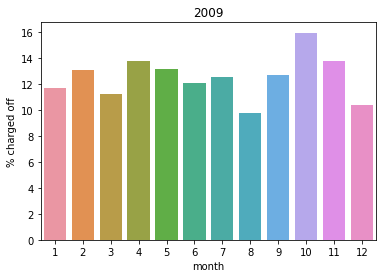

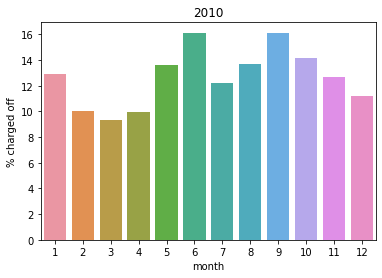

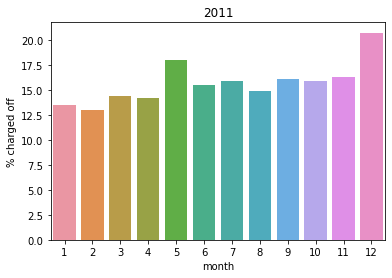

In [648]:
Data_LC['Year']=pd.DatetimeIndex(Data_LC['issue_d']).year
year_wise = pd.DataFrame()
year_list = []
month_list =[]
issued_list =[]
charge_off_list = []
percent_charged_off_list =[]

for year in range(2007,2012):
    for month in range(1,13):
        year_list.append(year)
        month_list.append(month)
        charge_off = Data_LC[(Data_LC['Year'] == year) & (pd.DatetimeIndex(Data_LC['issue_d']).month == month) & (Data_LC.loan_status == 'Charged Off')].funded_amnt.count()
        issued = Data_LC[(Data_LC['Year'] == year) & (pd.DatetimeIndex(Data_LC['issue_d']).month == month)].funded_amnt.count()
        charge_off_list.append(charge_off)
        issued_list.append(issued)
        percent_charged_off_list.append(round(charge_off/issued*100,2))

year_wise['year'] = year_list
year_wise['month'] = month_list
year_wise['issued']= issued_list
year_wise['charged off'] = charge_off_list
year_wise['% charged off'] = percent_charged_off_list

for year in range(2007,2012):
    plt.title(year)
    yearly_ds = year_wise[year_wise.year == year]
    sns.barplot(data = yearly_ds,x = yearly_ds.month, y = yearly_ds['% charged off'])
    plt.show()

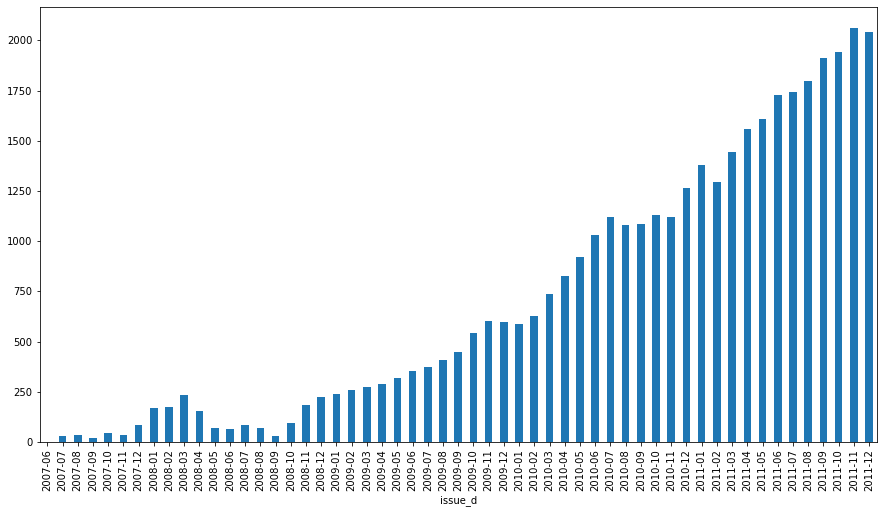

In [649]:
month= Data_LC.issue_d.unique()
month=[str(x)[:7] for x in month ]
r=list(range(len(month)))
monthly = Data_LC.groupby(by = 'issue_d').funded_amnt.count()
plt.figure(figsize=(15,8))
monthly.plot(kind ='bar')
plt.xticks(r,month[::-1])
plt.show()

#We can see that there is a dip in the number of loans around 2008 Sep, Oct timeperiod and after that it starts to rise and expands very rapidly
#What could explain this dip in the number of loans...the 2008 Financial Crisis?

### Segmented Univariant Analysis
###### We will now Filter the data based on primary analysis filter and look at singular rows

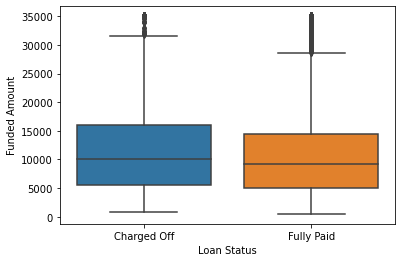

In [650]:
sns.boxplot( y="funded_amnt", x="loan_status" , data=Data_LC)
plt.ylabel("Funded Amount")
plt.xlabel("Loan Status")
plt.show()

Loan Amount has no corelation with defaulters

In [651]:
temp=Data_LC[Data_LC['loan_status']=='Charged Off']
percent_default_36=len(temp[temp['term']==36])*100/len(temp)
percent_default_60=len(temp[temp['term']==60])*100/len(temp)
print(percent_default_36,percent_default_60)                       

57.34849831171139 42.65150168828861


57% of Defaulters are the ones whos loans are of 36 months 

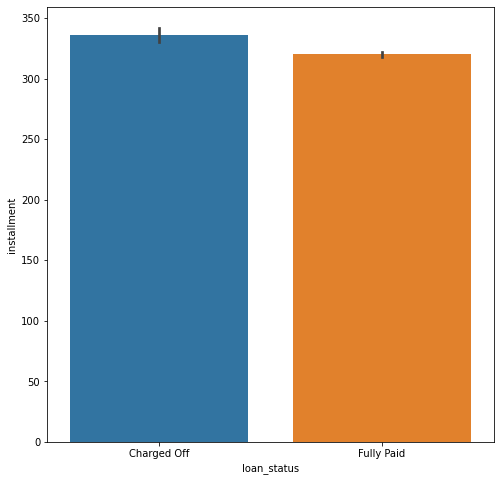

In [652]:
plt.figure(figsize=(8,8))
sns.barplot(x='loan_status',y='installment',data= Data_LC)
plt.show()

Higher Installment shows higher chance of Defaulting

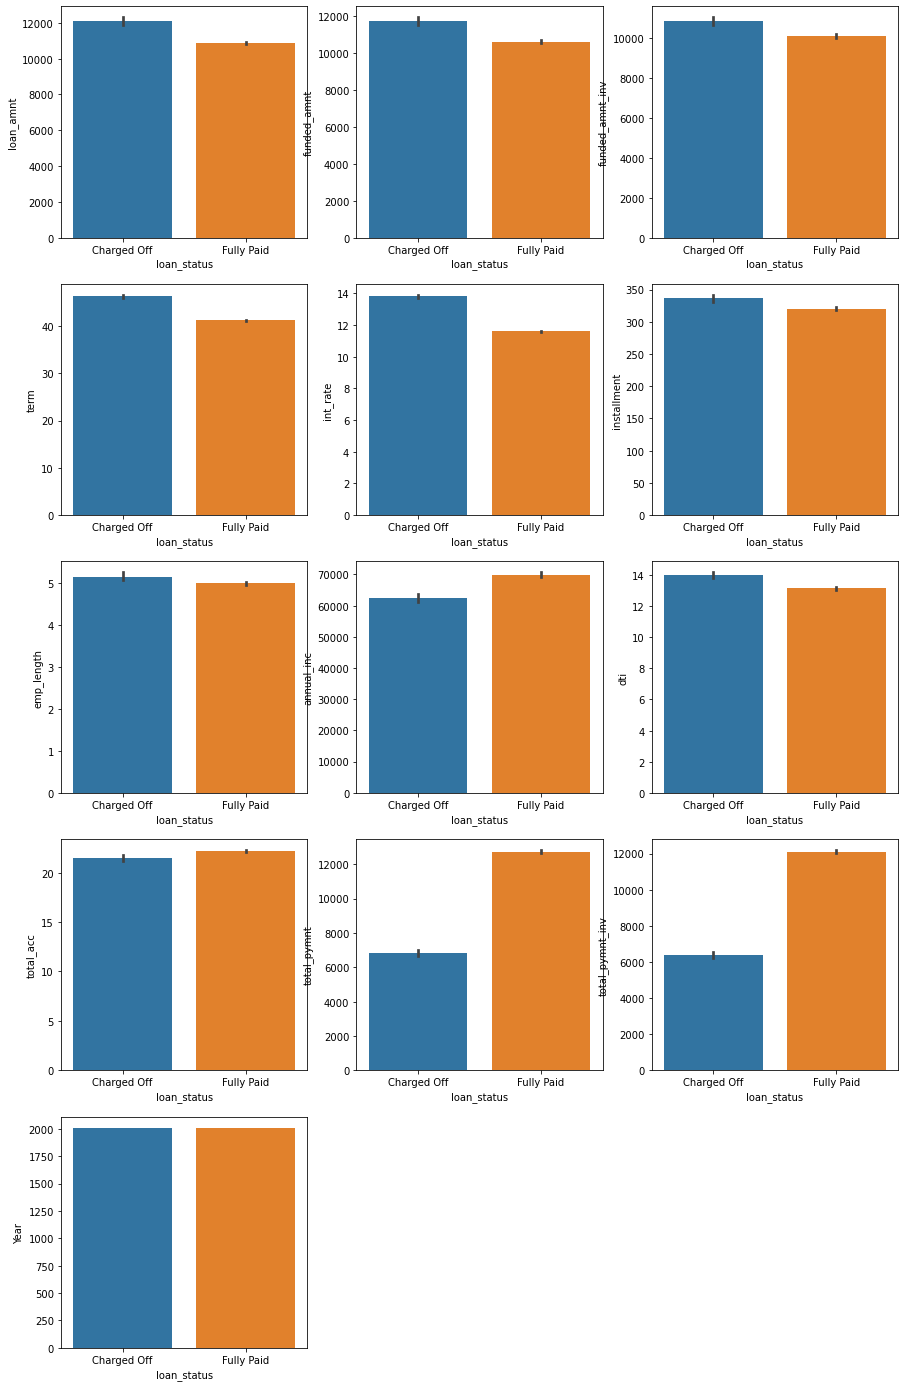

In [653]:
num_data = Data_LC.select_dtypes(include = [np.number])

plt.figure(figsize=(15,40))


for i in range(len(num_data.columns)):
    plt.subplot(8,3, i + 1)
    sns.barplot(y=num_data.columns[i], x='loan_status', data=Data_LC)

plt.show()

Following Points Found
* Higher Interest rate loans have a higher chance of defaulting 
* Higher installments show higher defaulting
* a loan that is consistantly late has a higher chance of defaulting
* Lower annual income has a higher defaulting chance
* Higher Revolving line utilization rate has a higher chance of defaulting


<AxesSubplot:xlabel='Percent_fail', ylabel='Count'>

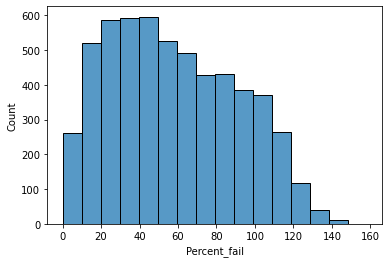

In [654]:
#Lets create a new Data frame to find percent at which there is faulure
Fail=pd.DataFrame()
Fail['Loan_amt']=Data_LC.funded_amnt[Data_LC['loan_status']=='Charged Off']
Fail['Amt_rec']=Data_LC.total_pymnt[Data_LC['loan_status']=='Charged Off']
Fail['Percent_fail']=Fail['Amt_rec']*100/Fail['Loan_amt']
Fail.Percent_fail.describe()
sns.histplot(x=Fail.Percent_fail, bins=16)

Highest chance of defaulting is when the aplicant has paid 20%-50% of the funded amount 

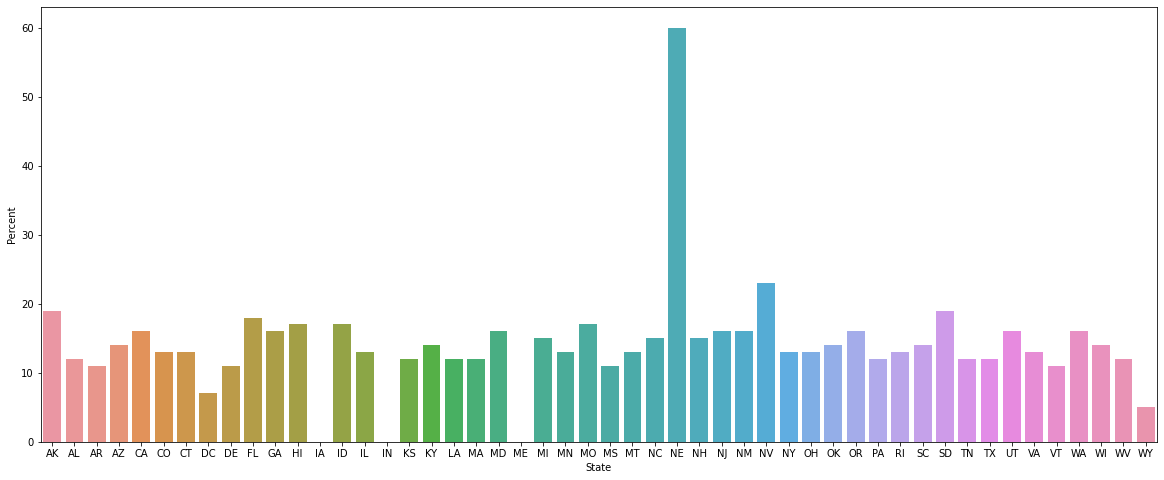

In [655]:
# % of Default / state
temp=Data_LC[Data_LC['loan_status']=='Charged Off']
Def_State=pd.DataFrame()
Def_State['State']=Data_LC.addr_state.unique()
Def_State['Total']=0
Def_State['C_off']=0
for x in range(0,len(Def_State)):
    Def_State.iat[x,1]=len(Data_LC[Data_LC.addr_state ==Def_State.State[x] ])
    Def_State.iat[x,2]=len(temp[temp.addr_state == Def_State.State[x]])
Def_State["Percent"]=round(Def_State.C_off*100/Def_State.Total)
plt.figure(figsize=(20,8))
sns.barplot(x='State',y='Percent',data=Def_State)
plt.show()

Nebraska has the highest percent of defaulters 

<AxesSubplot:xlabel='State'>

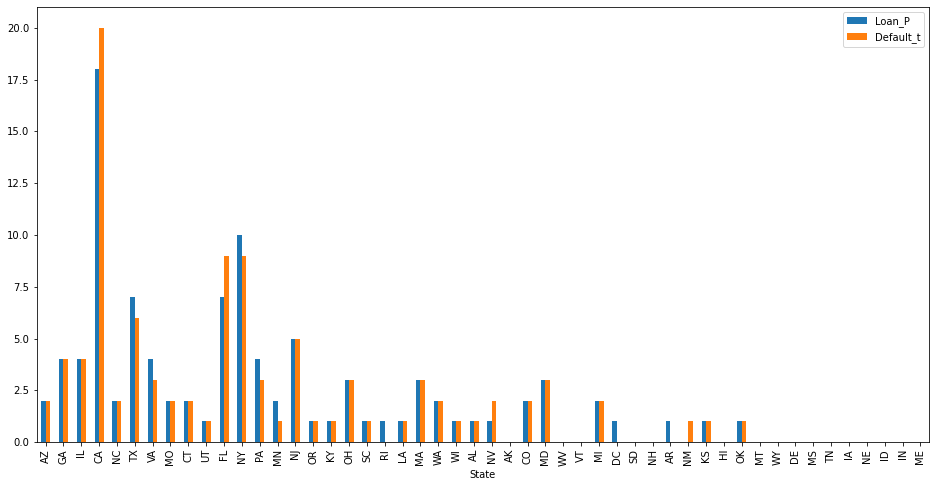

In [656]:
Def_State["Loan_P"]=round(Def_State['Total']*100/sum(Def_State['Total']))
Def_State["Default_t"]=round(Def_State['C_off']*100/sum(Def_State['C_off']))
Def_State.plot(x="State",y=["Loan_P","Default_t"],kind="bar",figsize=(16,8))

Ploting Shows us that the states CA and FL are the worst performing as their contribution to the defaulters is higher than their contribution to the total business in terms of counts. Where as FL , TX ,VA and MN are the good performers.The rest of the states are performing averagly where they contribute to both equaly or have 2 low data to analys

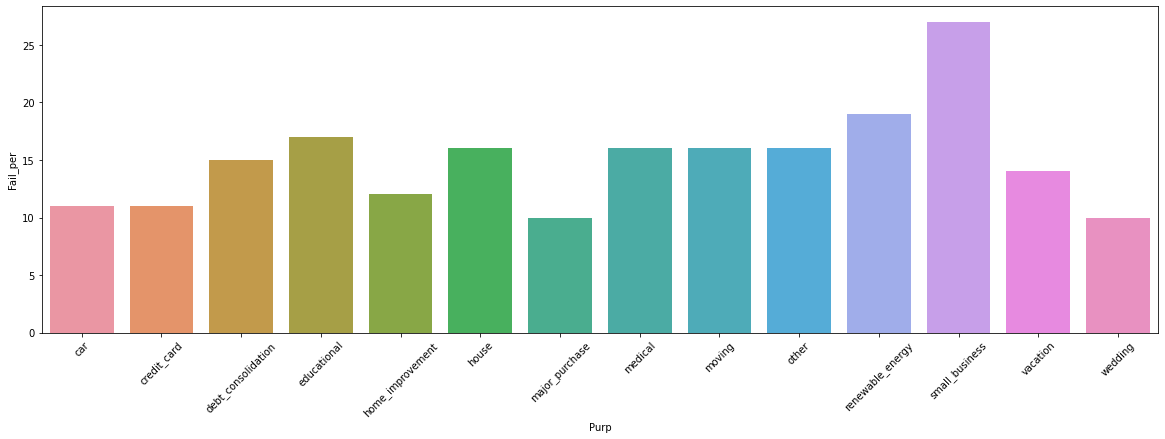

In [657]:
Loan_pur=pd.DataFrame()
Loan_pur['Purp']=Data_LC.purpose.unique()
Loan_pur['Total']=0
Loan_pur['C_off']=0
for x in range(0,len(Loan_pur)):
    Loan_pur.iat[x,1]=len(Data_LC[Data_LC.purpose==Loan_pur.Purp[x]])
    Loan_pur.iat[x,2]=len(temp[temp.purpose==Loan_pur.Purp[x]])
Loan_pur["Fail_per"]=round(Loan_pur.C_off*100/Loan_pur.Total)
plt.figure(figsize=(20,6))
sns.barplot(x=Loan_pur.Purp,y=Loan_pur.Fail_per)
plt.xticks(rotation=45)
plt.show()

Loans taken for small business show the highest chance of Defulting 

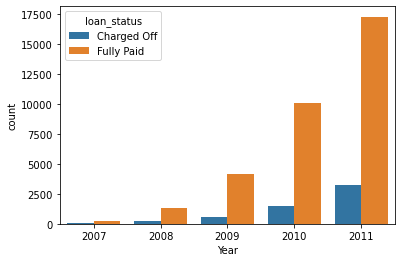

In [658]:
#Lets look at the application by year

sns.countplot(x='Year',hue='loan_status',data=Data_LC)
plt.show()

We see an exponential growth in the number of loans year on year where as there is a steady growth of defaulters .

In [659]:
Data_LC.funded_amnt.describe()

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

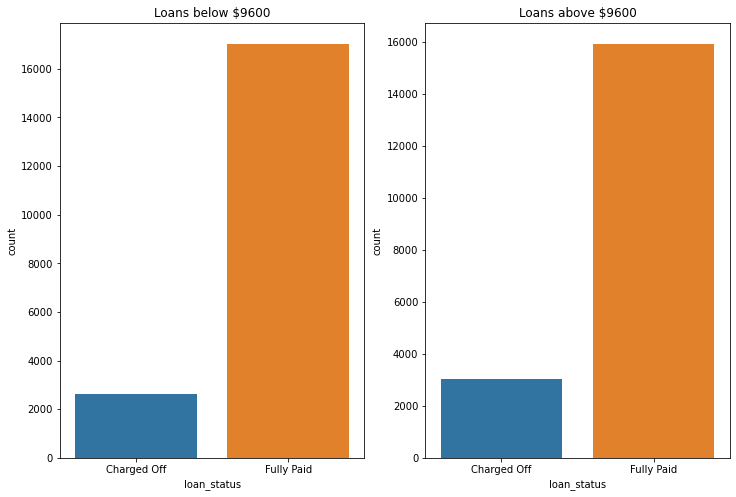

In [660]:
#Lets look at how the lower 50 percentile of loans perform
fig, axes = plt.subplots(1, 2,figsize=(12,8))
sns.countplot(ax=axes[0],x=Data_LC.loan_status[Data_LC.funded_amnt<=9600])
sns.countplot(ax=axes[1],x=Data_LC.loan_status[Data_LC.funded_amnt > 9600 ])
axes[0].set_title("Loans below $9600")
axes[1].set_title("Loans above $9600")
plt.show()

Loans that are higher in value tend to default more 

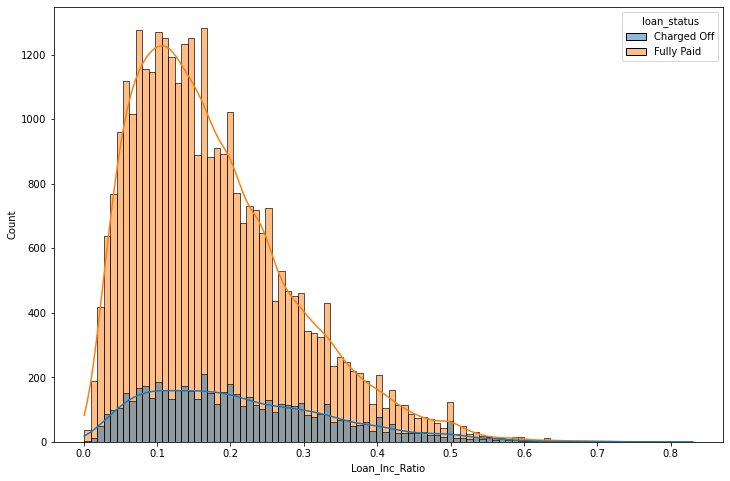

In [661]:
Data_LC["Loan_Inc_Ratio"]=Data_LC.funded_amnt/(Data_LC.annual_inc)
plt.figure(figsize=(12,8))
sns.histplot(x=Data_LC.Loan_Inc_Ratio,hue=Data_LC.loan_status,kde=True)
plt.locator_params(axis="x", nbins=10)
plt.show()

Most of the Defaults happen at a loan to income ration of 0.1

In [662]:

#Making a new column to check profit of a loan
Data_LC['Profit']=Data_LC.total_pymnt-Data_LC.funded_amnt


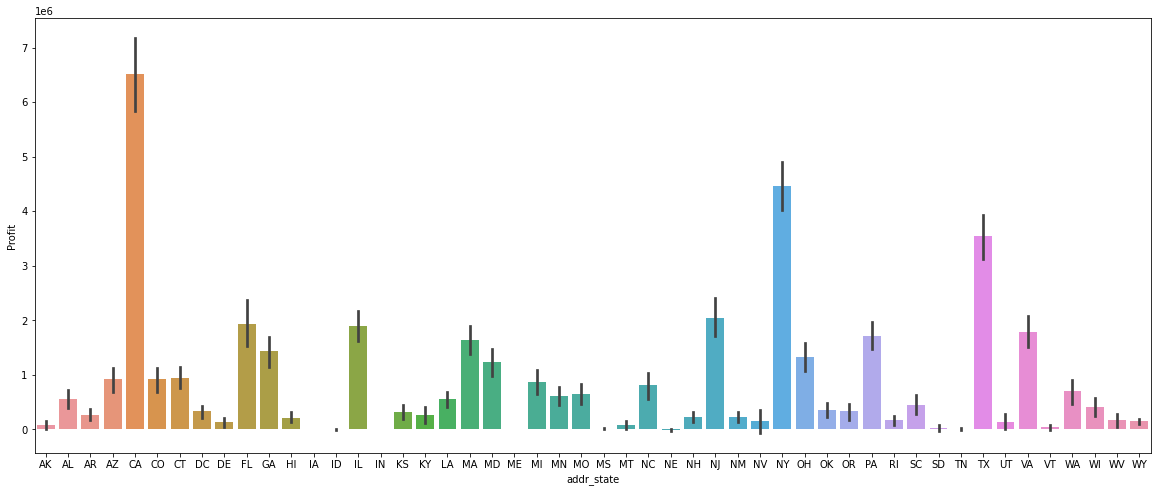

In [663]:
plt.figure(figsize=(20,8))
sns.barplot(x='addr_state',y='Profit',data=Data_LC,estimator=sum)
plt.show()

CA makes the most profit for the LC ,but that is expected as the number of loans are the highest 

In [664]:
profit_st=pd.DataFrame()
profit_st['State']=Data_LC.addr_state.unique()
profit_st['total_profit']=0
profit_st['no of loans']=0
for x in range (len(profit_st)):
    profit_st.iat[x,1]=sum(Data_LC.Profit[Data_LC.addr_state==profit_st.State[x]])
    profit_st.iat[x,2]=len(Data_LC[Data_LC.addr_state==profit_st.State[x]])
profit_st['profit per loan']=profit_st['total_profit']/profit_st['no of loans']
#plt.figure(figsize=(20,8))
#sns.barplot(x=profit_st.State,y=profit_st['profit per loan'])
#plt.show()
fig=px.bar(profit_st,x='State',y='profit per loan',color="no of loans")
fig.show()

Nebraska is the only state that is loosing money on an avrage for every loan, but has only 5 loans issued so the data is too low for analisys.
WY seems like the highest profit but the number of loans are too low for analisys
What we see is that even though CA has the highest number of loans TX makes the most profit per loan and also has a good number of loans issued.

In [665]:
Data_LC['Loan_applied2Funded']=Data_LC.funded_amnt_inv/Data_LC.loan_amnt
px.box(Data_LC,x='loan_status',y='Loan_applied2Funded')

The Ratio of ask to fund is  inconculsive

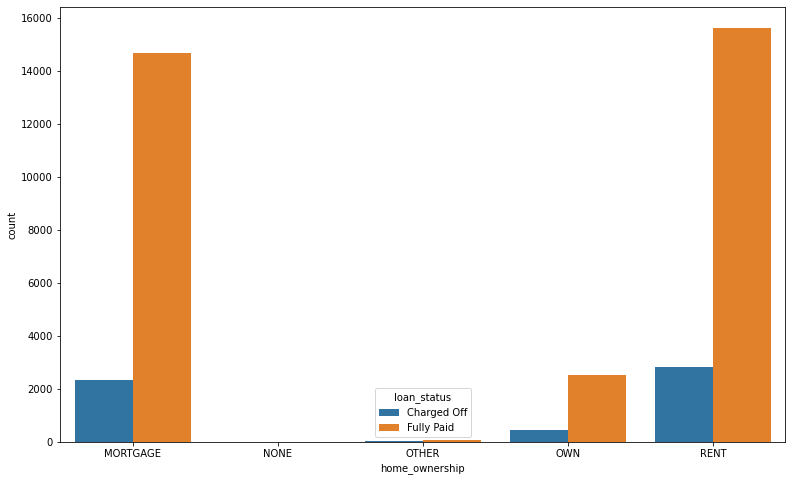

In [666]:
plt.figure(figsize=(13,8))
sns.countplot(data=Data_LC,x='home_ownership' , hue ='loan_status')
plt.show()
#we can see in the bar chart below that the charged off loans that are from the applicants who have a mortgage or rented home  
#are comparatively lower in loans with who have their own accomodation

In [667]:
home_count=pd.DataFrame(Data_LC.home_ownership.value_counts())
home_count

,home_ownership
RENT,18480
MORTGAGE,17021
OWN,2975
OTHER,98
NONE,3


In [668]:
home_c=pd.pivot_table(Data_LC,values='annual_inc',index=['home_ownership','loan_status'],aggfunc='count')
home_c.rename({'annual_inc':'count'},axis='columns')
home_c

annual_inc
home_ownership loan_status            
MORTGAGE       Charged Off        2327
               Fully Paid        14694
NONE           Charged Off           0
               Fully Paid            3
OTHER          Charged Off          18
               Fully Paid           80
OWN            Charged Off         443
               Fully Paid         2532
RENT           Charged Off        2839
               Fully Paid        15641

As we can see
* Mortgaged home aplicants defaulted 13% of the times
* Rendted home aplicants defaulted 15% of the times
* Own home aplicants defaulted 14.5% of the times 
There is no statitstical difference except the fact that own home applicants are very few in number.


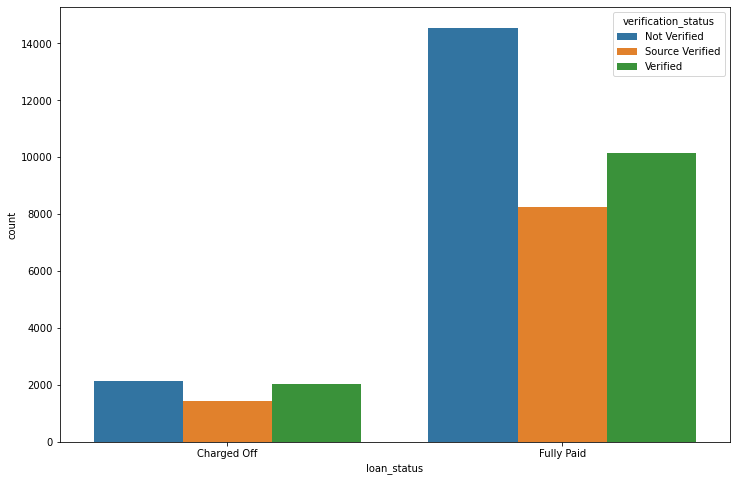

In [669]:
plt.figure(figsize=(12,8))
sns.countplot(data=Data_LC,x='loan_status',hue='verification_status')
plt.show()

In [670]:
Tl=list(range(5000,40000,5000))
amt_data=pd.DataFrame()
amt_data['value']=[str((x-5000))+"-"+str(x) for x in Tl]
amt_data['count_off']=0
amt_data['count_full']=0
y=0
for x in Tl:
    z=x-5000
    amt_data.iat[y,1]=len(Data_LC.funded_amnt_inv[(Data_LC.funded_amnt_inv<=x) &(Data_LC.funded_amnt_inv>z)& (Data_LC.loan_status=="Charged Off")])    
    amt_data.iat[y,2]=len(Data_LC.funded_amnt_inv[(Data_LC.funded_amnt_inv<=x) &(Data_LC.funded_amnt_inv>z)& (Data_LC.loan_status=="Fully Paid")])    
    y=y+1
    
amt_data["Percent off"]=round(amt_data.count_off*100/(amt_data.count_full+amt_data.count_off),2)
amt_data["Percent Paid"]=100-amt_data['Percent off']
fig=px.bar(amt_data,x='value',y=['Percent off','Percent Paid'],labels={'_value':"Percent"})
fig.show()

Defaulters go up as value of the loan goes up

In [671]:
# Loan Vs Income Vs loan status
Data_LC.Loan_Inc_Ratio=Data_LC.Loan_Inc_Ratio.apply(lambda x: round(x,1))
LS=Data_LC.groupby(by = "Loan_Inc_Ratio").loan_status.count()
LSp=pd.DataFrame(LS)
LSp['C_off']=0
for x in range (len(LSp)):
    LSp.iat[x,1]=len(Data_LC[(Data_LC.Loan_Inc_Ratio==LSp.index[x]) & (Data_LC.loan_status=="Charged Off") ])
LSp['percent']=LSp.C_off*100/LSp.loan_status
LSp.percent=LSp.percent.apply(lambda x : round(x,1))

fig=px.bar(y=LSp.percent,x=LSp.index,labels={'y':'Percent of Default','x':'Loan to Income Ratio'})
fig.show()

The rate of Defult increase once we cross an income to loan Ratio of 0.3 i.e Loans given where the loan is grater than 30% of the annual income have a very high rate of defaulting

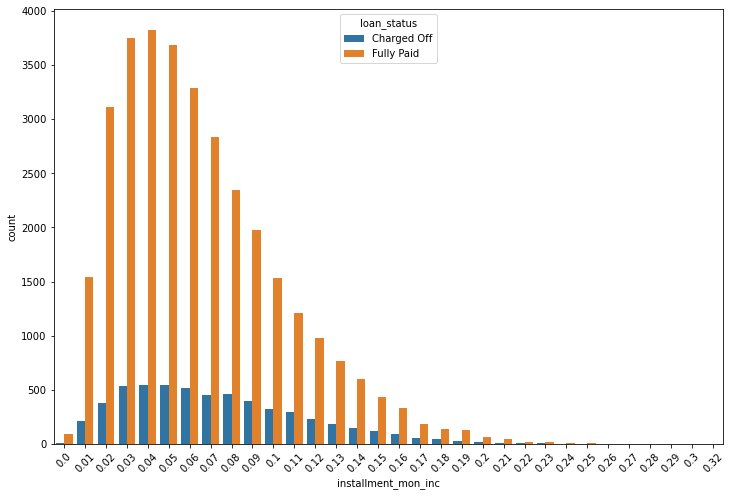

In [672]:
Data_LC['monthly_inc']=Data_LC.annual_inc/12
Data_LC['installment_mon_inc']=Data_LC.installment/Data_LC.monthly_inc
Data_LC.installment_mon_inc=Data_LC.installment_mon_inc.apply(lambda x: round(x,2))
plt.figure(figsize=(12,8))

sns.countplot(data=Data_LC,x='installment_mon_inc',hue='loan_status')
plt.xticks(rotation = 45)
plt.show()

In [673]:
df=pd.DataFrame(Data_LC[Data_LC.installment_mon_inc<0.3].installment_mon_inc.value_counts())
df['C_off']=0
for x in range(len(df)):
    df.iat[x,1]=len((Data_LC[(Data_LC.installment_mon_inc==df.index[x])&(Data_LC.loan_status=="Charged Off")]))
df['percent']=df.C_off*100/df.installment_mon_inc
px.bar(df,x=df.index,y='percent',labels={'index':'Installment to Monthly income Ratio','percent':'% of loans charged off','installment_mon_inc':'No of Loans'},color='installment_mon_inc')


The loans given at an installment value of 22% of monthly income have a very high default rate 

In [676]:
Data_LC['round_dti']=Data_LC.dti.apply(lambda x: round(x,0))

<AxesSubplot:xlabel='round_dti', ylabel='count'>

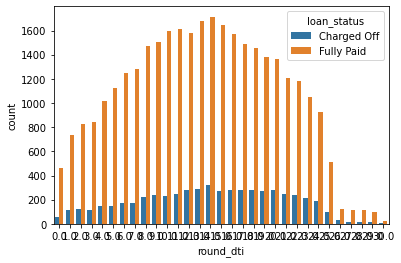

In [677]:
sns.countplot(data=Data_LC,x='round_dti',hue='loan_status')

<Figure size 1080x720 with 0 Axes>

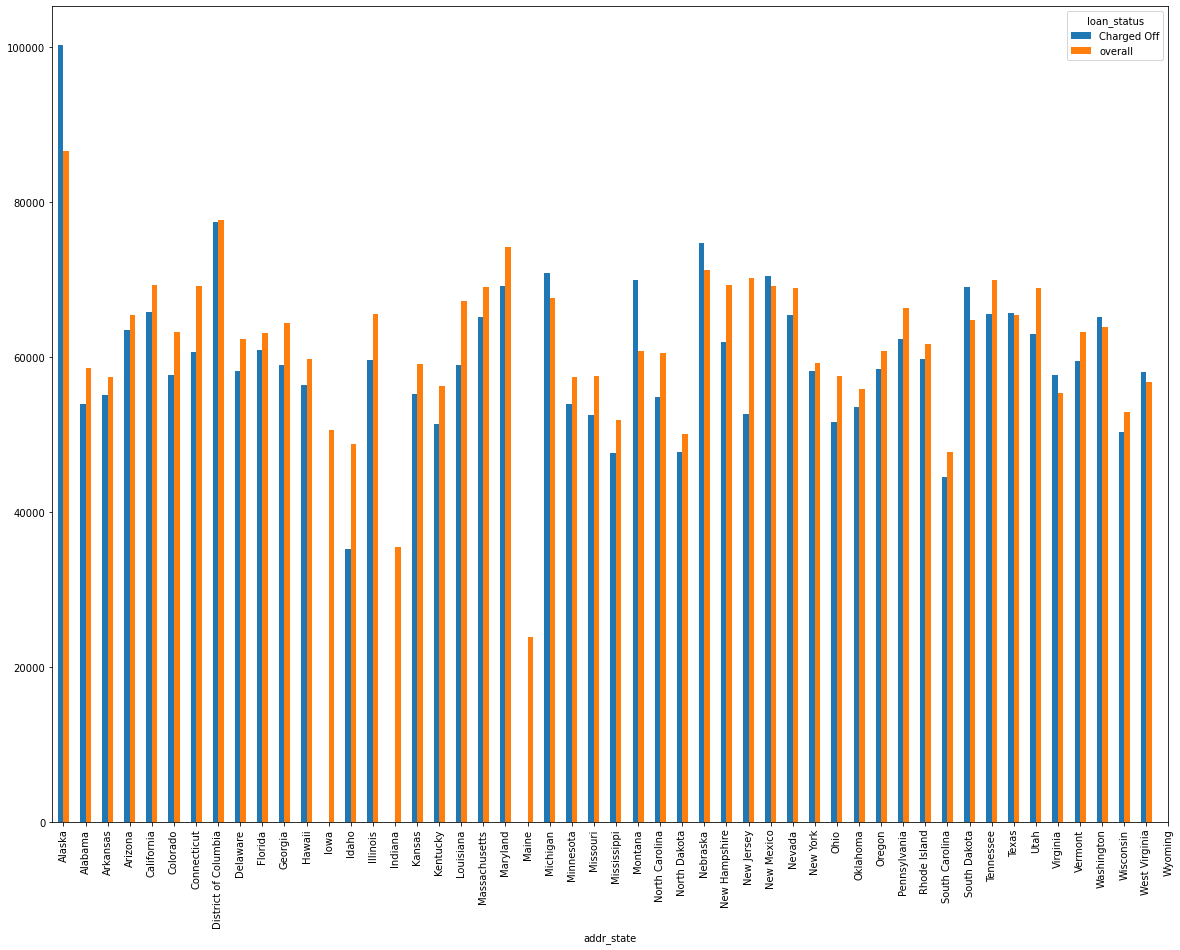

In [678]:
#Lets create a table with average income statewise and average income statewise for defaulters
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

avg_inc = pd.pivot_table(data = Data_LC, index = Data_LC.addr_state, columns = Data_LC.loan_status, values = 'annual_inc', aggfunc = np.mean)

avg_inc['overall']=avg_inc.mean(axis=1)
plt.figure(figsize=(15,10))
avg_inc[['Charged Off','overall']].plot.bar(figsize=(20,15))
locs , lables = plt.xticks()
plt.xticks(list(range(0,51)),list(states.values()),rotation=90)

plt.show()

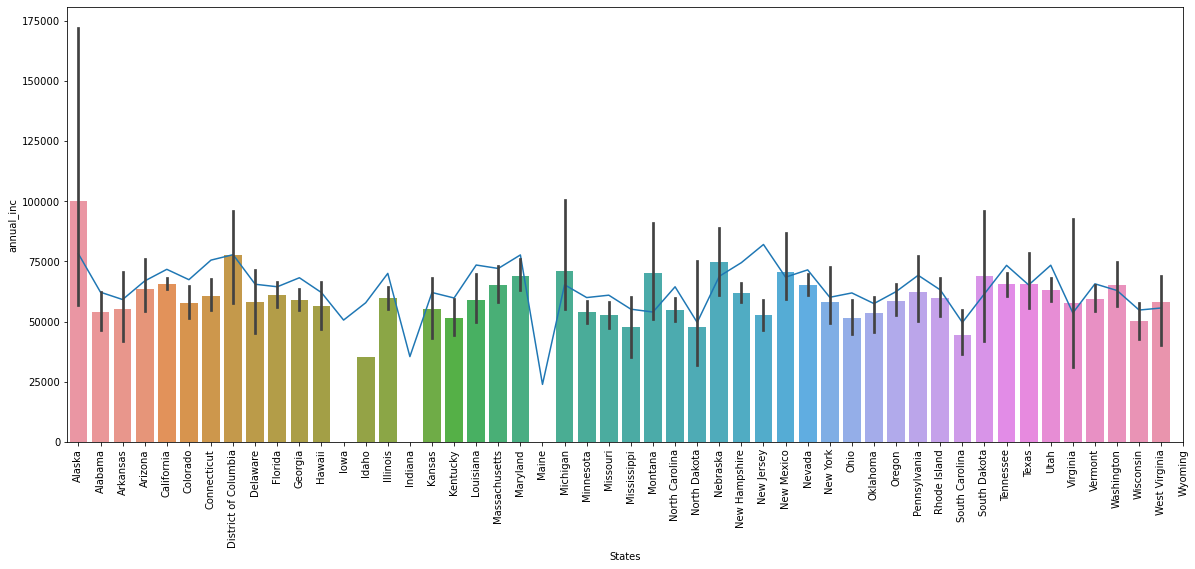

In [679]:
Data_LC.add
st_data=pd.DataFrame(Data_LC.groupby(by='addr_state').annual_inc.mean())
st_data.annual_inc=st_data.annual_inc.apply(lambda x: round(x,0))
plt.figure(figsize=(20,8))
plt.plot(st_data.index,st_data.annual_inc)
sns.barplot(x='addr_state',y='annual_inc',data=Data_LC[Data_LC.loan_status=='Charged Off'])
plt.xlabel("States")
plt.xticks(list(range(0,51)),list(states.values()),rotation=90)
plt.show()
# the line will show the avg income per applicant and the bar shows the avg income of people who defaulted

In [680]:
"""
i=0
C_off=Data_LC[Data_LC.loan_status=='Charged Off']
plt.figure(figsize=(15,150))
for x in list(states.keys()):
    temp=data=C_off[C_off.addr_state==x]
    if len(temp)!=0:
        plt.subplot(25,2,i+1)
        i=i+1
        sns.countplot(x=pd.DatetimeIndex(temp.issue_d).year)
        plt.title(states[x])
plt.show()
"""

"\ni=0\nC_off=Data_LC[Data_LC.loan_status=='Charged Off']\nplt.figure(figsize=(15,150))\nfor x in list(states.keys()):\n    temp=data=C_off[C_off.addr_state==x]\n    if len(temp)!=0:\n        plt.subplot(25,2,i+1)\n        i=i+1\n        sns.countplot(x=pd.DatetimeIndex(temp.issue_d).year)\n        plt.title(states[x])\nplt.show()\n"

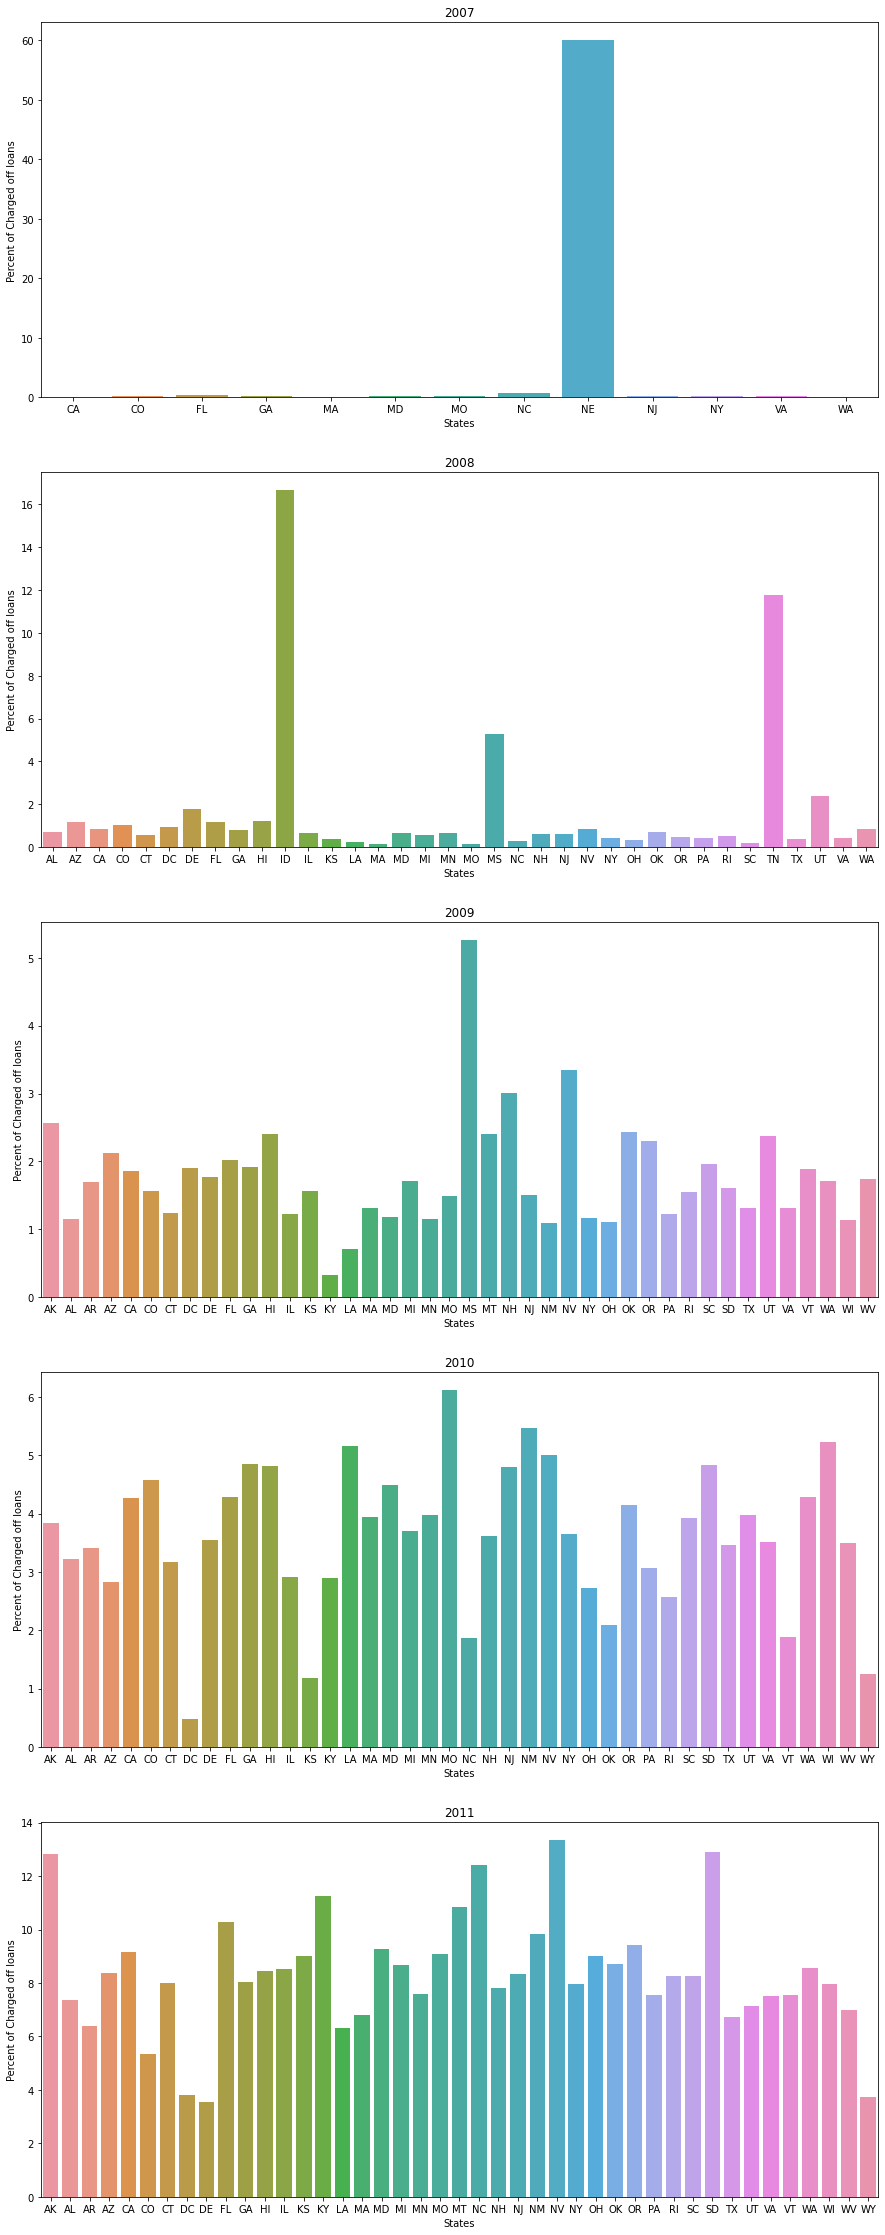

In [681]:
i=0
plt.figure(figsize=(15,40))
for z in [2007,2008,2009,2010,2011]:
    C_off=Data_LC[(Data_LC.loan_status=='Charged Off')]
    C_off=C_off[C_off.Year==z]
    st_data=pd.DataFrame()
    st_data['state']=[]
    st_data['clist']=[]
    st_data['total']=[]
    for x in list(states.keys()):
        temp=data=C_off[C_off.addr_state==x]

        if len(temp)!=0:
            st_data=st_data.append({'state':x,'clist':len(temp),'total':len(Data_LC[Data_LC.addr_state==x])},ignore_index=True)
    st_data['percent']=st_data.clist*100/st_data.total
    plt.subplot(5,1,i+1)
    i=i+1
    sns.barplot(data=st_data,x='state',y='percent')
    plt.ylabel("Percent of Charged off loans")
    plt.xlabel("States")
    plt.title(z)
plt.show()

In [682]:
Low_funded=Data_LC[Data_LC.Loan_applied2Funded!=1]
fully_funded =Data_LC[Data_LC.Loan_applied2Funded==1]